In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/cardekho_dataset.csv")
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [4]:
df.isna().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [5]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
x = df.drop("selling_price",axis=1)
y = df["selling_price"]
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                test_size=0.2,
                                                random_state=42)
model = RandomForestRegressor()
model.fit(x_train,y_train)


ValueError: could not convert string to float: 'Volvo XC60'

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['car_name','brand','model','seller_type','fuel_type','transmission_type','seats']
one_hot = OneHotEncoder(sparse_output=False)
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[   0.  ,    0.  ,    0.  , ...,   19.7 ,  796.  ,   46.3 ],
       [   0.  ,    0.  ,    0.  , ...,   18.9 , 1197.  ,   82.  ],
       [   0.  ,    0.  ,    0.  , ...,   17.  , 1197.  ,   80.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,   21.14, 1498.  ,  103.52],
       [   0.  ,    0.  ,    0.  , ...,   16.  , 2179.  ,  140.  ],
       [   0.  ,    0.  ,    0.  , ...,   18.  , 1497.  ,  117.6 ]])

In [9]:
for i, row in enumerate(transformed_x):
    try:
        float_values = np.array(row, dtype=np.float64)  # Try converting to float
    except ValueError:
        print(f"Row {i} contains non-numeric values:", row)


In [10]:
transformed_x[0]

array([0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e

In [11]:
x_train,x_test,y_train,y_test = train_test_split(transformed_x,
                                                 y,
                                                test_size=0.2,
                                                random_state=42)


model = RandomForestRegressor(n_jobs=-1)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9347196620641414

In [20]:
# Hyperparameter grid RandomizedSearchCV will search over
param_distributions = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
                       "max_depth": [None, 5, 10, 20, 30],
                       "max_features": ["sqrt", "log2", None],
                       "min_samples_split": [2, 4, 6, 8],
                       "min_samples_leaf": [1, 2, 4, 8]}

clf = RandomForestRegressor(n_jobs=-1)

# Setup RandomizedSearchCV 
n_iter = 30 # try 30 models total
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            n_iter=n_iter, 
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf (does cross-validation for us, so no need to use a validation set)
rs_clf.fit(x_train, y_train);

# Finish the timer
end_time = time.time()
print(f"[INFO] Total time taken for {n_iter} random combinations of hyperparameters: {end_time - start_time:.2f} seconds.")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  30.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  28.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  29.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  33.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  30.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  28.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=  25.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimator

NameError: name 'time' is not defined

In [21]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 30}

In [12]:
model = RandomForestRegressor(n_estimators=1200,
                              min_samples_split=4,
                              min_samples_leaf=1,
                              max_features=None,
                              max_depth=30)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9351803235066837

In [13]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.9221182214296937

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = model.predict(x_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² Score: 0.9352
Mean Absolute Error (MAE): 99142.1205
Mean Squared Error (MSE): 48795072129.1810
Root Mean Squared Error (RMSE): 220896.0664


In [15]:
import joblib

# Save the trained model
joblib.dump(model, 'car_price_model.pkl')

# Save the transformer for preprocessing categorical features
joblib.dump(transformer, 'transformer.pkl')


['transformer.pkl']

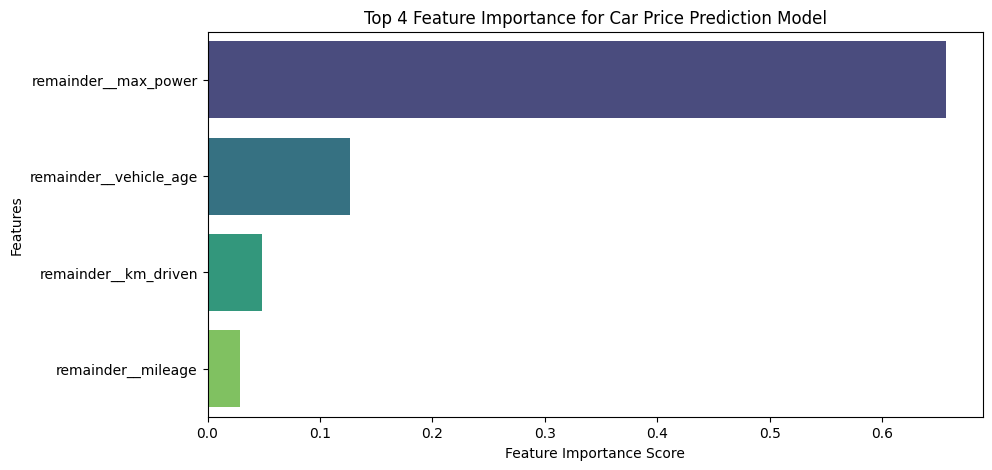

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importance
feature_importances = model.feature_importances_
feature_names = transformer.get_feature_names_out()

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Select top 4 most important features
top_n = 4
importance_df_top = importance_df.head(top_n)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(
    x=importance_df_top["Importance"], 
    y=importance_df_top["Feature"], 
    palette="viridis", 
    hue=importance_df_top["Feature"], 
    dodge=False
)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title(f"Top {top_n} Feature Importance for Car Price Prediction Model")
plt.legend([], [], frameon=False)  # Remove legend
plt.show()


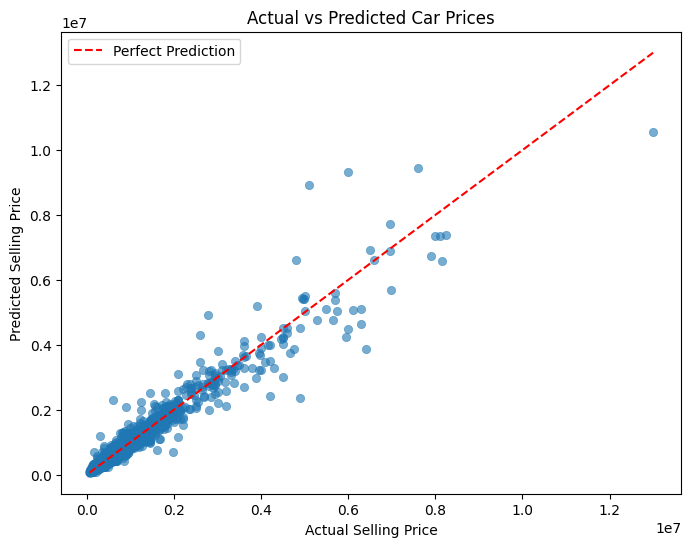

In [17]:
# Get model predictions
y_pred = model.predict(x_test)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Prediction")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()

In [18]:
import pandas as pd

# Example input for prediction
input_data = {
    "brand": "Maruti",
    "model": "Swift",
    "vehicle_age": 5,  # In years
    "fuel_type": "Petrol",
    "transmission_type": "Manual",
    "max_power": 82,  # Corrected column name
    "seats": 5,
    "engine": "1197",  # Must match format in training data
    "mileage": "21",  # Include mileage as a string if it was processed that way
    "km_driven": 50000,  # Total distance driven
    "seller_type": "Individual",  # Dealer, Individual, etc.
    "car_name": "Maruti Swift"  # Must match format in training data
}

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Ensure all preprocessing steps match training data
input_transformed = transformer.transform(input_df)

# Make prediction
predicted_price = model.predict(input_transformed)

# Output result
print(f"Predicted Car Price: {predicted_price[0]:,.2f}")


Predicted Car Price: 438,889.23


In [25]:
input_data = {
    "brand": "Hyundai",
    "model": "i10",
    "vehicle_age": 10,
    "fuel_type": "Petrol",
    "transmission_type": "Manual",
    "max_power": 78, 
    "seats": 5,
    "engine": "1197",
    "mileage": "20.36",
    "km_driven": 85000,
    "seller_type": "Individual",
    "car_name": "Hyundai i10"
}



In [26]:
# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Ensure all preprocessing steps match training data
input_transformed = transformer.transform(input_df)

# Make prediction
predicted_price = model.predict(input_transformed)

# Output result
print(f"Predicted Car Price: {predicted_price[0]:,.2f}")


Predicted Car Price: 235,880.80


In [ ]:
import pandas as pd

# Load the original dataset
df = pd.read_csv("data/cardekho_dataset.csv")

# Save a copy of the dataset
df_copy = df.copy()
df_copy.to_csv("data/cardekho_dataset_copy.csv", index=False)

In [4]:
# Load the copied dataset for further processing
df_new = pd.read_csv("data/cardekho_dataset_copy.csv")

# Display first few rows to verify
print(df_new.head())

   Unnamed: 0       car_name    brand     model  vehicle_age  km_driven  \
0           0    Maruti Alto   Maruti      Alto            9     120000   
1           1  Hyundai Grand  Hyundai     Grand            5      20000   
2           2    Hyundai i20  Hyundai       i20           11      60000   
3           3    Maruti Alto   Maruti      Alto            9      37000   
4           4  Ford Ecosport     Ford  Ecosport            6      30000   

  seller_type fuel_type transmission_type  mileage  engine  max_power  seats  \
0  Individual    Petrol            Manual    19.70     796      46.30      5   
1  Individual    Petrol            Manual    18.90    1197      82.00      5   
2  Individual    Petrol            Manual    17.00    1197      80.00      5   
3  Individual    Petrol            Manual    20.92     998      67.10      5   
4      Dealer    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         2

In [5]:
df_new.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
x = df_new.drop("selling_price",axis=1)
y = df_new["selling_price"]
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                test_size=0.2,
                                                random_state=42)

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['brand','model','seller_type','fuel_type','transmission_type','seats']
one_hot = OneHotEncoder(sparse_output=False)
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x[:5]

array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
        0.0, 'Maruti Alto', 9, 120000, 19.7, 796, 4

In [14]:
for i, row in enumerate(transformed_x):
    try:
        float_values = np.array(row, dtype=np.float64)  # Try converting to float
    except ValueError:
        print(f"Row {i} contains non-numeric values:", row)


Row 0 contains non-numeric values: [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0
 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 'Maruti Alto' 9 120000 19.7 796 46.3]
Row 1 contains non-numeric values: [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [16]:
import numpy as np
import pandas as pd

# Assuming transformed_x is a DataFrame or a NumPy array
df_transform = pd.DataFrame(transformed_x)  # Convert to DataFrame if it's not already

In [19]:
# Function to check if a row is fully numeric
def is_numeric(row):
    try:
        row.astype(np.float64)  # Try converting entire row to float
        return True
    except ValueError:
        return False

# Apply the check and drop non-numeric rows
mask = df_transform.apply(is_numeric, axis=1)
df_cleaned = df_transform[mask]  # Keep only numeric rows

# Reset index after dropping rows
df_cleaned = df_cleaned.reset_index(drop=True)

# Display results
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

# Save cleaned data (optional)
df_cleaned.to_csv("data/cleaned_transformed_x.csv", index=False)

Original shape: (15411, 14)
Cleaned shape: (0, 176)
